In [8]:
import os
import gzip
from scipy import stats
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
import networkx as nx
from sklearn.metrics import roc_curve, auc, f1_score
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scienceplots
import requests
import pickle
import powerlaw
import gc
import seaborn as sns
from statannot import add_stat_annotation
import math
import random
import sys

from main_function import *
import main_function
from importlib import reload
reload(main_function)

<module 'main_function' from '/home/qinjiajie/jupyter_code/AUC_upload/main_function.py'>

# read index_set

In [9]:
file_path = './index_set/nodes_3000_3/%s.pkl' % 'ground_truth'
    
with open(file_path, 'rb') as f:
    ground_truth = pickle.load(f)

file_path = './index_set/nodes_3000_3/%s.pkl' % 'index'
    
with open(file_path, 'rb') as f:
    index = pickle.load(f)

file_path = './index_set/nodes_3000_3/%s.pkl' % 'index_error'
    
with open(file_path, 'rb') as f:
    index_error = pickle.load(f)

In [10]:
file_path = './index_set/nodes_3000_8/%s.pkl' % 'ground_truth'
    
with open(file_path, 'rb') as f:
    ground_truth_8 = pickle.load(f)

file_path = './index_set/nodes_3000_8/%s.pkl' % 'index'
    
with open(file_path, 'rb') as f:
    index_8 = pickle.load(f)

file_path = './index_set/nodes_3000_8/%s.pkl' % 'index_error'
    
with open(file_path, 'rb') as f:
    index_error_8 = pickle.load(f)

In [11]:
file_path = './index_set/nodes_3000_8_repeat_100/%s.pkl' % 'accuracy_degree'
    
with open(file_path, 'rb') as f:
    accuracy_degree = pickle.load(f)

In [12]:
gamma_hete = np.load('./index_set/hete_with_gamma/gamma_hete_3000_3.npz')
gamma_hete_8 = np.load('./index_set/hete_with_gamma/gamma_hete_3000_8.npz')

In [13]:
M=10
alpha=0.5
beta=0.3
q_1_1 = []
for z1 in np.arange(-M, M+1, 1):
    q_1_1.append(pz(z1, M, alpha, beta))
    
z = np.array(range(-M,M+1,1))
a = beta*(1-alpha)/(alpha*(1-beta))
az = a**z
q_baseline = sum(q_1_1[(M+1):]) + 0.5*q_1_1[M]

In [14]:
file_path = './index_set/empirical_network/%s.pkl' % 'ground_truth'
    
with open(file_path, 'rb') as f:
    ground_truth_empirical = pickle.load(f)

file_path = './index_set/empirical_network/%s.pkl' % 'index'
    
with open(file_path, 'rb') as f:
    index_empirical = pickle.load(f)

# Fig2

In [15]:
def zeta_delta_gamma(alpha,beta,ga,M,N,start,stop):
    from scipy.stats import norm
    kbar=3
    q_1_1_0 = pz(0, M, alpha, beta)
    zeta = []
    for delta_gamma in np.arange(start,stop,0.00025):
        temp = q_1_1_0*N*np.sqrt(kbar*N/2) * (delta_gamma/((2*ga-3)**2))
        zeta.append([delta_gamma,norm.cdf(temp)])
    
    return np.array(zeta)

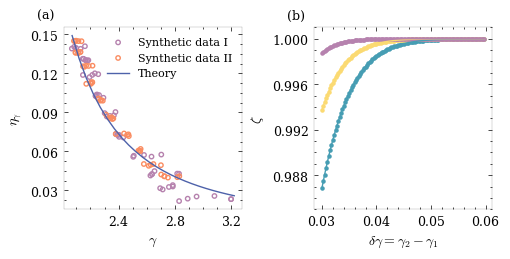

In [16]:
c = (183/256,131/256,175/256)
c1 = (251/256,141/256,97/256)
c2 = (145/256,166/256,115/256)
bwith = 0.1
fs=9
from matplotlib.ticker import MaxNLocator

with plt.style.context(['science', 'no-latex']):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5.2, 2.7))
    k=0
    for ax in axs.flat:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.xaxis.set_major_locator(MaxNLocator(4))
        ax.spines['bottom'].set_linewidth(bwith)
        ax.spines['left'].set_linewidth(bwith)
        ax.spines['top'].set_linewidth(bwith)
        ax.spines['right'].set_linewidth(bwith)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.set_title('(%s)' % chr(97+k), x=-0.1, y=1,fontsize=fs)
        k=k+1
    ax = axs[0]
    
    for i in list(index.keys()):
        ax.scatter(estimate_gamma(ground_truth[i]),
                    (index[i][0].mean() - index[i][1].mean()), # 
                    marker='o',facecolors='none',edgecolors=c, s=10)
    ax.scatter(estimate_gamma(ground_truth[i]),
                (index[i][0].mean() - index[i][1].mean()), #
                marker='o',facecolors='none',edgecolors=c,label='Synthetic data I',s=10)

    
    for i in list(index_8.keys()):
        ax.scatter(estimate_gamma(ground_truth_8[i]), #
                    (index_8[i][0].mean()- index_8[i][1].mean()),
                    marker='o',facecolors='none',edgecolors=c1,s=10)  
    ax.scatter(estimate_gamma(ground_truth_8[i]),
                (index_8[i][0].mean() - index_8[i][1].mean()), # 
                marker='o',facecolors='none',edgecolors=c1,label='Synthetic data II',s=10)

    q_1000_7 = [1-sum(q_1_1*q_gamma(3000,ga,az)) for ga in np.arange(2.07,3.25,0.05)]
    ax.plot(np.arange(2.07,3.25,0.05),(q_1000_7 - q_baseline),label = 'Theory',c = (78/256,98/256,171/256))
    ax.set_xlabel(r'$\gamma$',fontsize=10)
    ax.set_ylabel(r'$\eta_{\gamma}$',fontsize=10)
    ax.legend(fontsize=fs-1)

    
    ax1 = axs[1]
    ga1=2.3
    zeta_gamma_temp  = zeta_delta_gamma(0.5,0.3,ga1,10,120,0.03,0.06)
    ax1.plot(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1], color=(70/256,158/256,180/256))
    ax1.scatter(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1], color=(70/256,158/256,180/256),s=5, label=r'$\alpha=0.5,\beta=0.3$')
    
    zeta_gamma_temp  = zeta_delta_gamma(0.5,0.33,ga1,10,120,0.03,0.06)
    ax1.plot(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1],color=(252/256,219/256,114/256))
    ax1.scatter(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1],color=(252/256,219/256,114/256),s=5, label=r'$\alpha=0.5,\beta=0.33$')
    
    zeta_gamma_temp  = zeta_delta_gamma(0.5,0.4,ga1,10,120,0.03,0.06)
    ax1.plot(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1],color=(183/256,131/256,175/256 ))
    ax1.scatter(zeta_gamma_temp[:,0],zeta_gamma_temp[:,1],color=(183/256,131/256,175/256 ),s=5, label=r'$\alpha=0.5,\beta=0.4$')
    ax1.set_ylim([0.985,1.001])
    ax1.set_xlabel(r'$\delta \gamma = \gamma_2 - \gamma_1$',fontsize=10)
    ax1.set_ylabel(r'$\zeta$',fontsize=10)
    
plt.tight_layout()
plt.subplots_adjust(wspace =0.4, hspace =0.25)
# plt.savefig("./result_plot/Fig2.eps", format='eps',bbox_inches='tight',dpi=300,pad_inches=0.0)
plt.show()

# Fig3

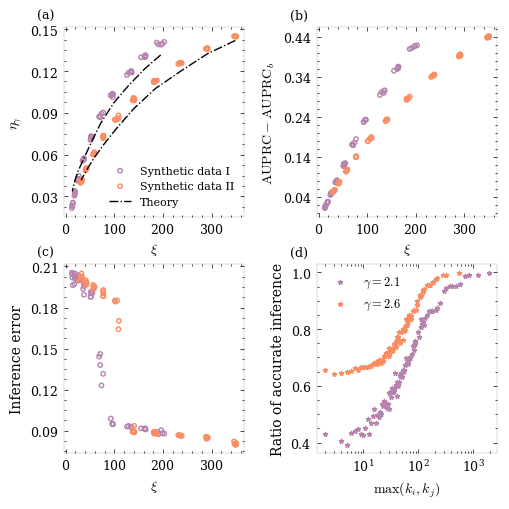

In [17]:
c = (183/256,131/256,175/256)
c1 = (251/256,141/256,97/256)
c2 = (145/256,166/256,115/256)
c_s = [np.array(c).reshape(1,-1),np.array(c1).reshape(1,-1),np.array(c2).reshape(1,-1)]
fs=9
bwith=0.1
with plt.style.context(['science', 'no-latex']):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5.2, 5.2))
    k=0
    for ax in axs.flat:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.xaxis.set_major_locator(MaxNLocator(4))
        ax.spines['bottom'].set_linewidth(bwith)
        ax.spines['left'].set_linewidth(bwith)
        ax.spines['top'].set_linewidth(bwith)
        ax.spines['right'].set_linewidth(bwith)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.set_title('(%s)' % chr(97+k), x=-0.1, y=1,fontsize=fs)
        k=k+1

    
    ax = axs[0,0]
    for i in list(index.keys()):
        ax.scatter(degree_heterogeneity(ground_truth[i]),
                    (index[i][0].mean() - index[i][1].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c,s=10)
    ax.scatter(degree_heterogeneity(ground_truth[i]),
                    (index[i][0].mean() - index[i][1].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c,label='Synthetic data I',s=10)

    q_2 = [1-sum(q_1_1*q_gamma(3000,ga,az)) for ga in sorted(gamma_hete['arr_0'])]
    ax.plot(sorted(gamma_hete['arr_1'],reverse=True),(q_2 - q_baseline),c='k',linestyle='-.')
    
        
    for i in list(index_8.keys()):
        
        ax.scatter(degree_heterogeneity(ground_truth_8[i]),
                    (index_8[i][0].mean() - index_8[i][1].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c1,s=10)
    ax.scatter(degree_heterogeneity(ground_truth_8[i]),
                    (index_8[i][0].mean() - index_8[i][1].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c1,label='Synthetic data II',s=10)
    q_2 = [1-sum(q_1_1*q_gamma(3000,ga,az)) for ga in sorted(gamma_hete_8['arr_0'])]
    ax.plot(sorted(gamma_hete_8['arr_1'],reverse=True),(q_2 - q_baseline),c='k',label='Theory',linestyle='-.')
    
    ax.set_xlabel(r'$\xi$',fontsize=10)
    ax.set_ylabel(r'$\eta_{\gamma}$',fontsize=10)
    ax.legend(fontsize=fs-1)

    ax = axs[0,1]
    for i in list(index.keys()):
        
        ax.scatter(degree_heterogeneity(ground_truth[i]),
                    (index[i][2].mean() - index[i][3].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c,s=10)
    ax.scatter(degree_heterogeneity(ground_truth[i]),
                    (index[i][2].mean() - index[i][3].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c,s=10)

    ax.set_xlabel(r'$\xi$',fontsize=10)
    ax.set_ylabel(r'$\text{AUPRC} - \text{AUPRC}_{b}$')
    ax.set_yticks([0.04, 0.14, 0.24, 0.34,0.44])
        
    for i in list(index_8.keys()):
        
        ax.scatter(degree_heterogeneity(ground_truth_8[i]),
                    (index_8[i][2].mean() - index_8[i][3].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c1,s=10)
    ax.scatter(degree_heterogeneity(ground_truth_8[i]),
                    (index_8[i][2].mean() - index_8[i][3].mean()),
                    marker='o',facecolors='none',
                    edgecolors=c1,label='simulation2',s=10)

    ax = axs[1,0]
    for i in list(index_error.keys()):
        ax.scatter(degree_heterogeneity(ground_truth[i]),
                    index_error[i][0].mean(),
                    marker='o',facecolors='none',
                    edgecolors=c,s=10)
    for i in list(index_error_8.keys()):
        ax.scatter(degree_heterogeneity(ground_truth_8[i]),
                    index_error_8[i][0].mean(),
                    marker='o',facecolors='none',
                    edgecolors=c1,s=10)
    
    ax.set_xlabel(r'$\xi$',fontsize=10)
    ax.set_ylabel('Inference error')
    
    
    ax = axs[1,1]
    k=0
    e_g = estimate_gamma(ground_truth_8['0'])
    e_g = [e_g[0],e_g[4]]
    for i in list(accuracy_degree.keys()):
        zz1 = accuracy_degree[i]
        df = pd.DataFrame({'x': zz1[5][zz1[4]==1], 'y': zz1[6][zz1[4]==1]})
        mean_accuracy = df.groupby('x')['y'].mean().reset_index()
        ax.scatter(mean_accuracy.x,mean_accuracy.y/100,
                    marker='*',c=c_s[k],s=10, label=r'$\gamma=%s$' % round(e_g[k],1))
        k = k+1
    ax.set_yticks([0.4, 0.6, 0.8,  1])
    ax.set_xscale('log')
    ax.set_xlabel(r'$\max{(k_i,k_j)}$',fontsize=10)
    ax.set_ylabel('Ratio of accurate inference')
    ax.legend(fontsize=fs)
 
plt.tight_layout()
plt.subplots_adjust(wspace =0.4, hspace =0.25)
# plt.savefig("./result_plot/Fig3.eps", format='eps',bbox_inches='tight',dpi=300,pad_inches=0.0)
plt.show()

# Fig4

In [4]:
M=10
alpha=0.5
beta=0.3
q_1_1 = []
for z1 in np.arange(-M, M+1, 1):
    q_1_1.append(pz(z1, M, alpha, beta))
    
z = np.array(range(-M,M+1,1))
a = beta*(1-alpha)/(alpha*(1-beta))
az = a**z
q_baseline = sum(q_1_1[(M+1):]) + 0.5*q_1_1[M]
q_baseline

0.8188419939331538

In [5]:
md = []
hete = []
q = []

for i in list(index_empirical.keys()):
    hete = hete + degree_heterogeneity(ground_truth_empirical[i])
    q = q + list(index_empirical[i][0].mean() - index_empirical[i][1].mean())
    md = md + list(read_mean_degree(ground_truth_empirical[i]))

In [6]:
from scipy.io import loadmat

# 加载 .mat 文件
fit_surface = loadmat('./index_set/empirical_network/fit_surface.mat')

# 查看加载的数据结构

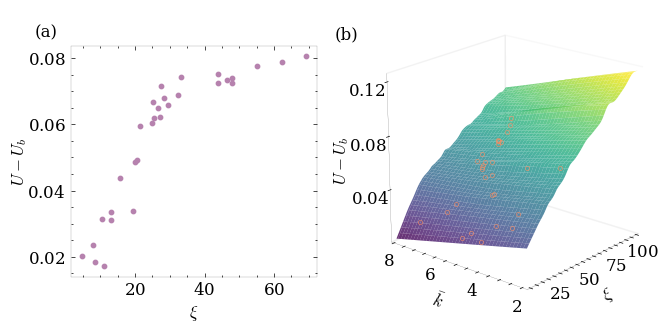

In [19]:
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import MaxNLocator
from scipy.interpolate import interp2d
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import axes3d
from matplotlib import gridspec
fs=12

with plt.style.context(['science', 'no-latex']):
    fig = plt.figure(facecolor='white',figsize=(7, 3))
    fig.patch.set_facecolor('none') 
    
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    ax2 = fig.add_subplot(gs[0])
    ax2.scatter(np.array(hete),np.array(q),
                marker='o',c=c_s[0],
                alpha=1,s=10)
    ax2.set_xlabel(r'$\xi$',fontsize=fs+1)
    ax2.set_ylabel(r'$\text{AUC} - \text{AUC} _{b}$',fontsize=fs+1)
    
    ax2.set_xlabel(r'$\xi$',fontsize=fs+1)
    ax2.set_ylabel(r'$U - U _{b}$', labelpad=-1,fontsize=10)
    bwith=0.1
    ax2.spines['bottom'].set_linewidth(bwith)
    ax2.spines['left'].set_linewidth(bwith)
    ax2.spines['top'].set_linewidth(bwith)
    ax2.spines['right'].set_linewidth(bwith)
    ax2.set_title('(a)', x=-0.1, y=1,fontsize=fs)
    ax2.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax2.xaxis.label.set_size(fs)
    ax2.yaxis.label.set_size(fs)
    ax2.tick_params(axis='x', labelsize=fs)
    ax2.tick_params(axis='y', labelsize=fs)
    
    ax = fig.add_subplot(gs[1], projection='3d')
    x = np.array(hete)
    y = np.array(md)
    z = np.array(q)
    # ax.scatter(x, y, z,color='r', s=50, alpha=1)
    ax.plot(x, y, z, markeredgecolor=c_s[1], marker='o',markerfacecolor='none',markeredgewidth=0.5, linestyle='', markersize=3, zorder=3,alpha=0.8)
    ax.plot_surface(fit_surface['X'], fit_surface['Y'], fit_surface['Z'], cmap='viridis', edgecolor='none', alpha=0.8,zorder=1,)
    ax.set_box_aspect([1, 1, 1])  # 设置三维坐标轴的比例
    
    # 循环处理每个点
    for i in range(1,len(x)):
        x_match = x[i]
        y_match = y[i]
    
        # 进行插值，得到表面的 z 值
        z_surface = griddata((fit_surface['X'].ravel(), fit_surface['Y'].ravel()), fit_surface['Z'].ravel(), (x_match, y_match), method='linear')
        # 表面点
        surface_point = [x_match, y_match, z_surface]
        # 垂直距离
        vertical_distance = np.abs(z[i] - surface_point[2])
        # 绘制垂直线
        ax.plot([x[i], surface_point[0]], [y[i], surface_point[1]], [z[i], surface_point[2]], 'k-.', linewidth=0.1,zorder=3,alpha=0.1,dashes=(15, 20))
    # # 设置标签
    
    ax.set_xlabel(r'$\xi$',fontsize=15)
    ax.set_ylabel(r'$\bar{k}$',fontsize=15)
    ax.set_zlabel(r'$U-U_{b}$', rotation = 90,fontsize=15)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.zaxis.label.set_size(fs)
    
    ax.zaxis.set_major_locator(MaxNLocator(4))
    ax.yaxis.set_major_locator(MaxNLocator(4))
    ax.xaxis.set_major_locator(MaxNLocator(4))
    
    # 调整刻度值与坐标轴的距离
    ax.tick_params(axis='x', pad=-3, labelsize=fs)  # 设置 X 轴刻度标签与坐标轴之间的距离
    ax.tick_params(axis='y', pad=-3, labelsize=fs)  # 设置 Y 轴刻度标签与坐标轴之间的距离
    ax.tick_params(axis='z', pad=1, labelsize=fs)  # 设置 Z 轴刻度标签与坐标轴之间的距离
    ax.xaxis.labelpad = -3  # 设置 X 轴标签与坐标轴之间的距离
    ax.yaxis.labelpad = -3  # 设置 Y 轴标签与坐标轴之间的距离
    ax.zaxis.labelpad = 0  # 设置 Z 轴标签与坐标轴之间的距离
     
    ax.zaxis.set_rotate_label(False) #一定要先关掉默认的旋转设置
    

    ax.grid(False)
    ax.xaxis.pane.fill = False  # 不显示 X 轴的面背景
    ax.yaxis.pane.fill = False  # 不显示 Y 轴的面背景
    ax.zaxis.pane.fill = False  # 不显示 Z 轴的面背景
    # 设置坐标轴线宽
    ax.xaxis.line.set_linewidth(bwith)  # 设置 X 轴线宽
    ax.yaxis.line.set_linewidth(bwith)  # 设置 Y 轴线宽
    ax.zaxis.line.set_linewidth(bwith)  # 设置 Z 轴线宽
    # 隐藏次刻度
    
    ax.set_xlim([4.5,100])
    ax.set_ylim([1.9,8])
    ax.view_init(elev=20, azim= 220)
    ax.set_position([0.23, 0, 1.05, 1])
    ax.set_title('(b)', x=-0.05, y=0.95,fontsize=fs)
# 手动调整子图之间的间距
# plt.subplots_adjust(wspace=-0.5)

# 显示图形
# plt.tight_layout()  # 自动调整子图布局

# plt.savefig("./result_plot/Fig4.eps", format='eps', bbox_inches='tight',dpi=300,pad_inches=0.0)
plt.show()